## MACD with Python

Default setting s for MACD indicator in tradingview.com are Fast length = 12
Slow length = 26
Signal smoothing = 9

Buy sell signals are generated when MACD line crosses the signal line.

In addition to this we have also the histogram that servers as an early warning for crossovers. When bars are getting shorter, it signals that crossover signal might come soon.

Bullish market -  when both lines are above zero, crossover is sell signal
Bearish market - when both lines are below zero, crossover is buy signal

And the crossover might signify the reversal of a trend.


In [170]:
#optional installations: 
#!pip install yfinance --upgrade --no-cache-dir
#!pip3 install pandas_datareader


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# ___library_import_statements___
import pandas as pd

# for pandas_datareader, otherwise it might have issues, sometimes there is some version mismatch
pd.core.common.is_list_like = pd.api.types.is_list_like

# make pandas to print dataframes nicely
pd.set_option('expand_frame_repr', False)  

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

#newest yahoo API 
import yfinance as yahoo_finance

#optional 
#yahoo_finance.pdr_override()

%matplotlib inline

In [171]:
# ___variables___
#ticker = 'AAPL'
ticker = 'TSLA'
#ticker = 'GOOGL'

start_time = datetime.datetime(2019, 1, 1)
#end_time = datetime.datetime(2019, 1, 20)
end_time = datetime.datetime.now().date().isoformat()         # today

In [172]:
# yahoo gives only daily historical data
connected = False
while not connected:
    try:
        ticker_df = web.get_data_yahoo(ticker, start=start_time, end=end_time)
        connected = True
        print('connected to yahoo')
    except Exception as e:
        print("type error: " + str(e))
        time.sleep( 5 )
        pass   

# use numerical integer index instead of date    
ticker_df = ticker_df.reset_index()
print(ticker_df.head(5))

connected to yahoo
        Date       High        Low       Open      Close      Volume  Adj Close
0 2019-01-02  63.026001  59.759998  61.220001  62.023998  58293000.0  62.023998
1 2019-01-03  61.880001  59.476002  61.400002  60.071999  34826000.0  60.071999
2 2019-01-04  63.599998  60.546001  61.200001  63.537998  36970500.0  63.537998
3 2019-01-07  67.348000  63.549999  64.344002  66.991997  37756000.0  66.991997
4 2019-01-08  68.802002  65.403999  68.391998  67.070000  35042500.0  67.070000


In [173]:
df = ticker_df

In [174]:
def computeMACD (df, n_fast, n_slow, n_smooth):
    data = df['Adj Close']
    
    fastEMA = data.ewm(span=n_fast, min_periods=n_slow).mean()
    slowEMA = data.ewm(span=n_slow, min_periods=n_slow).mean()
    MACD = pd.Series(fastEMA-slowEMA, name = 'MACD')
    MACDsig = pd.Series(MACD.ewm(span=n_smooth, min_periods=n_smooth).mean(), name='MACDsig')
    MACDhist = pd.Series(MACD - MACDsig, name = 'MACDhist')
    df = df.join(MACD)
    df = df.join(MACDsig)
    df = df.join(MACDhist)
    
    return df

In [175]:
df = computeMACD(df, 12, 26, 9)

In [176]:
print(df.head())
print(df.tail())

        Date       High        Low       Open      Close      Volume  Adj Close  MACD  MACDsig  MACDhist
0 2019-01-02  63.026001  59.759998  61.220001  62.023998  58293000.0  62.023998   NaN      NaN       NaN
1 2019-01-03  61.880001  59.476002  61.400002  60.071999  34826000.0  60.071999   NaN      NaN       NaN
2 2019-01-04  63.599998  60.546001  61.200001  63.537998  36970500.0  63.537998   NaN      NaN       NaN
3 2019-01-07  67.348000  63.549999  64.344002  66.991997  37756000.0  66.991997   NaN      NaN       NaN
4 2019-01-08  68.802002  65.403999  68.391998  67.070000  35042500.0  67.070000   NaN      NaN       NaN
          Date        High         Low        Open       Close      Volume   Adj Close       MACD    MACDsig  MACDhist
443 2020-10-05  433.640015  419.329987  423.350006  425.679993  44722800.0  425.679993  10.941954  12.845685 -1.903732
444 2020-10-06  428.779999  406.049988  423.790009  413.980011  49146300.0  413.980011   9.579472  12.192443 -2.612971
445 2020-10-0

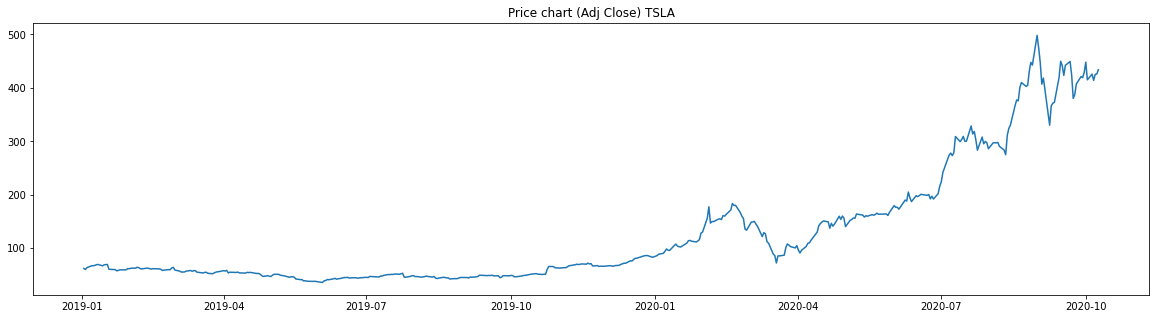

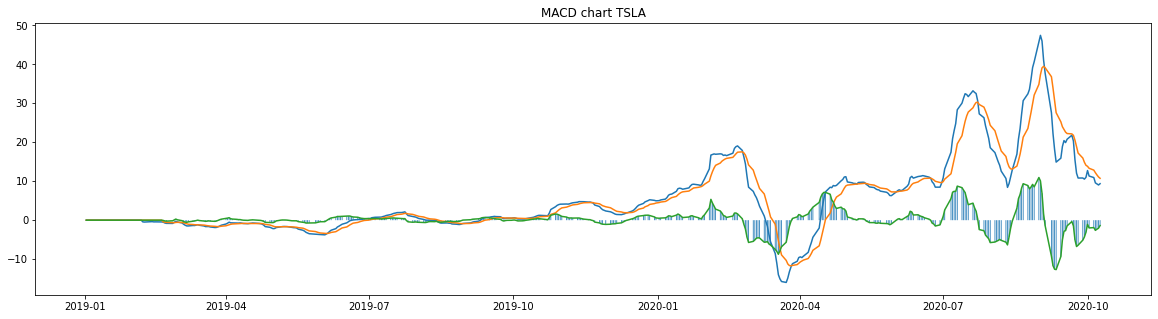

In [177]:
# plot price
plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Price chart (Adj Close) ' + str(ticker))
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(20,5))
plt.title('MACD chart ' + str(ticker))
plt.plot(df['Date'], df['MACD'].fillna(0))
plt.plot(df['Date'], df['MACDsig'].fillna(0))
plt.plot(df['Date'], df['MACDhist'].fillna(0))
plt.bar(df['Date'], df['MACDhist'].fillna(0), width=0.5, snap=False)

plt.show()

#### Sources:
https://github.com/Crypto-toolbox/pandas-technical-indicators  <BR>
https://www.quantopian.com/posts/technical-analysis-indicators-without-talib-code  <BR>
https://www.investopedia.com/terms/m/macd.asp  <BR>    
https://www.youtube.com/watch?v=qyU9IM3M_Kw&ab_channel=EXFINSISExpertFinancialAnalysis   <BR> 
https://www.youtube.com/watch?v=E3KP1WyLITY&ab_channel=Trading212    